EDA

In [8]:
import pandas as pd
from fastapi import FastAPI
import sklearn as sk

In [9]:
# Cargar los datos desde los archivos CSV generados en Transformaciones.py
df = pd.read_csv("./Datos/df.csv")

df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')

In [10]:
df[df.duplicated()]

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,status,tagline,title,vote_average,vote_count,cast,crew,release_year,return,original_title
677,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",105045,de,"East-Berlin, 1961, shortly after the erection ...",0.122178,"[{'name': 'Studio Babelsberg', 'id': 264}, {'n...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1995-02-16,...,Released,"A love, a hope, a wall.",The Promise (1995),5.0,1.0,"[{'cast_id': 5, 'character': 'Sophie II', 'nam...","[{'job': 'Director', 'name': 'Margarethe von T...",1995,0.000000,The Promise
838,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",132641,ja,"Ten years into a marriage, the wife is disappo...",0.096079,"[{'name': 'Toho Company', 'id': 882}]","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",1953-04-29,...,Released,NaN,Wife (1953),0.0,0.0,"[{'cast_id': 4, 'character': 'Mihoko Nakagawa'...","[{'job': 'Director', 'name': 'Mikio Naruse'}]",1953,0.000000,Wife
950,NaN,4.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",22649,en,British nurse Catherine Barkley (Helen Hayes) ...,1.914697,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1932-12-08,...,Released,Every woman who has loved will understand,A Farewell to Arms (1932),6.2,29.0,"[{'cast_id': 1, 'character': 'Catherine Barkle...","[{'job': 'Director', 'name': 'Frank Borzage'}]",1932,6.250000,A Farewell to Arms
1466,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",105045,de,"East-Berlin, 1961, shortly after the erection ...",0.122178,"[{'name': 'Studio Babelsberg', 'id': 264}, {'n...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1995-02-16,...,Released,"A love, a hope, a wall.",The Promise (1995),5.0,1.0,"[{'cast_id': 5, 'character': 'Sophie II', 'nam...","[{'job': 'Director', 'name': 'Margarethe von T...",1995,0.000000,The Promise
1467,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",105045,de,"East-Berlin, 1961, shortly after the erection ...",0.122178,"[{'name': 'Studio Babelsberg', 'id': 264}, {'n...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1995-02-16,...,Released,"A love, a hope, a wall.",The Promise (1995),5.0,1.0,"[{'cast_id': 5, 'character': 'Sophie II', 'nam...","[{'job': 'Director', 'name': 'Margarethe von T...",1995,0.000000,The Promise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40286,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",97995,en,"After breaking a mirror in his home, superstit...",0.141558,"[{'name': 'Max Linder Productions', 'id': 38162}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1921-02-06,...,Released,NaN,Seven Years Bad Luck (1921),5.6,4.0,"[{'cast_id': 1001, 'character': 'Max.', 'name'...","[{'job': 'Director', 'name': 'Max Linder'}]",1921,0.000000,Seven Years Bad Luck
44812,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",10991,ja,When Molly Hale's sadness of her father's disa...,6.480376,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': '4...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2000-07-08,...,Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown (2000),6.0,144.0,"[{'cast_id': 1, 'character': 'Ash Ketchum', 'n...","[{'job': 'Director', 'name': 'Michael Haigney'...",2000,4.275705,Pokémon: Spell of the Unknown
44818,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",0.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",12600,ja,"All your favorite Pokémon characters are back,...",6.080108,[],"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2001-07-06,...,Released,NaN,Pokémon 4Ever: Celebi - Voice of the Forest (2...,5.7,82.0,"[{'cast_id': 1, 'character': 'Ash Ketchum (voi...","[{'job': 'Director', 'name': 'Kunihiko Yuyama'...",2001,inf,Pokémon 4Ever: Celebi - Voice of the Forest
45253,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",265189,sv,"While holidaying in the French A

In [11]:
df=df.drop_duplicates()

In [12]:
df[df.duplicated()]

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,status,tagline,title,vote_average,vote_count,cast,crew,release_year,return,original_title


In [13]:
df.isnull().sum()

belongs_to_collection    40873
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24966
title                        0
vote_average                 0
vote_count                   0
cast                         0
crew                         0
release_year                 0
return                       0
original_title               0
dtype: int64

In [14]:
df.dtypes

belongs_to_collection            object
budget                          float64
genres                           object
id                                int64
original_language                object
overview                         object
popularity                      float64
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
vote_average                    float64
vote_count                      float64
cast                             object
crew                             object
release_year                      int64
return                          float64
original_title                   object
dtype: object

In [17]:
df.describe(include='all')

c:\Users\Manu Cozzari\Desktop\Proyecto\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,status,tagline,title,vote_average,vote_count,cast,crew,release_year,return,original_title
count,4487,4.536000e+04,45360,45360.000000,45349,44419,45360.000000,45360,45360,45360,...,45280,20394,45360,45360.000000,45360.000000,45360,45360,45360.000000,45360.0,45360
unique,1695,NaN,4065,NaN,89,44232,NaN,22703,2389,NaN,...,6,20269,45295,NaN,NaN,42883,18830,NaN,NaN,42196
top,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",NaN,"[{'id': 18, 'name': 'Drama'}]",NaN,en,No overview found.,NaN,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,...,Released,Based on a true story.,Another World (2014),NaN,NaN,[],[],NaN,NaN,Cinderella
freq,29,NaN,4997,NaN,32193,133,NaN,11792,17842,NaN,...,44921,7,3,NaN,NaN,2349,836,NaN,NaN,11
mean,NaN,4.234076e+06,NaN,108026.001609,NaN,NaN,2.926427,NaN,NaN,1992-05-15 22:35:06.666666752,...,NaN,NaN,NaN,5.624052,110.119004,NaN,NaN,1991.881790,inf,NaN
min,NaN,0.000000e+00,NaN,2.000000,NaN,NaN,0.000000,NaN,NaN,1874-12-09 00:00:00,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1874.000000,0.0,NaN
25%,NaN,0.000000e+00,NaN,26386.750000,NaN,NaN,0.388840,NaN,NaN,1978-10-06 00:00:00,...,NaN,NaN,NaN,5.000000,3.000000,NaN,NaN,1978.000000,0.0,NaN
50%,NaN,0.000000e+00,NaN,59852.500000,NaN,NaN,1.130354,NaN,NaN,2001-08-30 00:00:00,...,NaN,NaN,NaN,6.000000,10.000000,NaN,NaN,2001.000000,0.0,NaN
75%,NaN,0.000000e+00,NaN,156533.500000,NaN,NaN,3.691695,NaN,NaN,2010-12-17 00:00:00,...,NaN,NaN,NaN,6.800000,34.000000,NaN,NaN,2010.000000,0.0,NaN
max,NaN,3.800000e+08,NaN,469172.000000,NaN,NaN,547.488298,NaN,NaN,2020-12-16 00:00:00,...,NaN,NaN,NaN,10.000000,14075.000000,NaN,NaN,2020.000000,inf,NaN


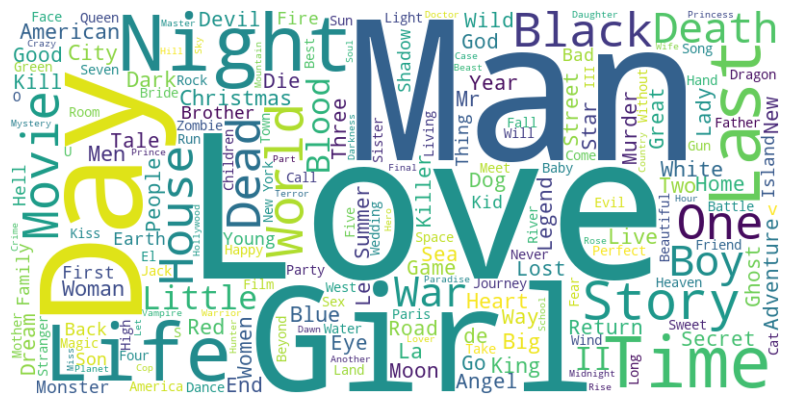

In [16]:
#Hacemos una nube de palabras para saber las palabras más utilizadas en los titulos de las peliculas
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(review for review in df['title'].dropna())

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()